# Project: Wrangling and Analyze Data

In [1]:
# importing the libraries required 
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# importing"WeRateDogs" twitter archive into a panda dataframe
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#explore twitter_archive_df
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Using requests library to download the tsv file hosted on udacity server
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
# Save it to file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
# importing 'image_predictions.tsv' into a panda dataframe
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
 image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#explore image_predictions_df
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
#copyed from twitter-api.py at: "https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py"
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
#identify information from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON

#create date frame with the columns name 
tweet_json = pd.DataFrame(columns=['tweet_id','tweet_text','retweet_count',
                                    'favorite_count','text_range','created_at'])
# Save tweet-json.txt to file
#use .append to assign data to the columns 
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id_str']
        tweet_text = data['full_text']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        text_range = data['display_text_range']
        created_at = data['created_at']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id,tweet_text,
                                                        retweet_count, favorite_count,
                                                        text_range, created_at]],
                                                        columns=['tweet_id','tweet_text',
                                                                 'retweet_count','favorite_count',
                                                                  'text_range','created_at']))                                                                     
tweet_json = tweet_json.reset_index(drop=True)




In [8]:
tweet_json.head()

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467,"[0, 85]",Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819,"[0, 138]",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,"[0, 121]",Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908,"[0, 79]",Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048,"[0, 138]",Sat Jul 29 16:00:24 +0000 2017


In [9]:
#explore tweet_json
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null object
tweet_text        2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
text_range        2354 non-null object
created_at        2354 non-null object
dtypes: object(6)
memory usage: 110.4+ KB


#### The 3 data frames are:-

>twitter_archive_df: contains data read from provided csv

>image_predictions_df: contains data read (by using requests) from tsv file hosted on the server

>tweet_json: contains data that should be obtained from the Twitter handle by using tweepy library but I used the file provided by udacity since I couldn't manage a Twitter API 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### 1- Twitter Archived Enhanced Data

In [10]:
# display 20 random sample
twitter_archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None
1856,675522403582218240,NaN,NaN,2015-12-12 03:47:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sammy. He's a Motorola Firefox. Hat under...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675522403...,10,10,Sammy,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
821,770293558247038976,NaN,NaN,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None
190,855857698524602368,NaN,NaN,2017-04-22 18:55:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",NaN,NaN,NaN,https://twitter.com/perfy/status/8558573181681...,13,10,None,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,None,None,None
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None


In [11]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Records where neither the floofer nor the pupper columns are None
print('neither the floofer nor the pupper:',len(twitter_archive_df[
    (twitter_archive_df.pupper != 'None') & ( twitter_archive_df.floofer != 'None')]))
# Records where neither the doggo nor the floofer columns are None
print('neither the doggo nor the floofer:',len(twitter_archive_df[
    (twitter_archive_df.floofer != 'None') & (twitter_archive_df.doggo != 'None')]))
# Records where neither the floofer nor the puppo columns are None
print('neither the floofer nor the puppo:',len(twitter_archive_df[
    (twitter_archive_df.floofer != 'None') & (twitter_archive_df.puppo != 'None')]))
# Records where neither the doggo nor the pupper columns are None
print('neither the doggo nor the pupper:',len(twitter_archive_df[
    (twitter_archive_df.doggo != 'None') & (twitter_archive_df.pupper != 'None')]))
# Records where neither the doggo nor the puppo columns are None
print('neither the doggo nor the puppo:',len(twitter_archive_df[
    (twitter_archive_df.puppo != 'None') & (twitter_archive_df.doggo != 'None')]))
# Records where neither the pupper nor the puppo columns are None
print('neither the pupper nor the puppo:',len(twitter_archive_df[
    (twitter_archive_df.pupper != 'None') & (twitter_archive_df.puppo != 'None')]))

neither the floofer nor the pupper: 0
neither the doggo nor the floofer: 1
neither the floofer nor the puppo: 0
neither the doggo nor the pupper: 12
neither the doggo nor the puppo: 1
neither the pupper nor the puppo: 0


In [14]:
twitter_archive_df.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

##### 2. Image Predictions data

In [15]:
# display 20 random sample
image_predictions_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
1132,728387165835677696,https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg,1,collie,0.266414,True,Great_Pyrenees,0.138546,True,keeshond,0.109014,True
1759,825829644528148480,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great_Pyrenees,0.853407,True,golden_retriever,0.053531,True,English_setter,0.045830,True
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True
1055,714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1011,709449600415961088,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True,Dandie_Dinmont,0.074429,True,Norfolk_terrier,0.033776,True
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,1,toy_poodle,0.497755,True,golden_retriever,0.282017,True,miniature_poodle,0.090032,True
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False


In [16]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
# checking for duplication in the jpg_url column
image_predictions_df[image_predictions_df.jpg_url.duplicated()].shape[0]

66

##### 3. Twitter  JSON

In [19]:
# display 20 random sample
tweet_json.sample(20)

,tweet_id,tweet_text,retweet_count,favorite_count,text_range,created_at
1839,675878199931371520,"Ok, I'll admit this is a pretty adorable bunny...",1570,4531,"[0, 134]",Sun Dec 13 03:21:34 +0000 2015
986,748977405889503236,What jokester sent in a pic without a dog in i...,3759,11235,"[0, 112]",Fri Jul 01 20:31:43 +0000 2016
168,859196978902773760,We only rate dogs. This is quite clearly a smo...,25661,75193,"[0, 124]",Tue May 02 00:04:57 +0000 2017
1761,678446151570427904,Touching scene here. Really stirs up the emoti...,1785,4358,"[0, 143]",Sun Dec 20 05:25:42 +0000 2015
1103,734912297295085568,This is Jax. He's a literal fluffball. Sneaky ...,572,2993,"[0, 82]",Tue May 24 01:02:00 +0000 2016
991,748575535303884801,This is one of the most reckless puppers I've ...,2272,6696,"[0, 116]",Thu Jun 30 17:54:50 +0000 2016
38,884876753390489601,This is Lola. It's her first time outside. Mus...,6096,28514,"[0, 118]",Tue Jul 11 20:47:12 +0000 2017
465,817171292965273600,This is Tebow. He kindly requests that you put...,2326,9690,"[0, 103]",Fri Jan 06 00:49:53 +0000 2017
191,855818117272018944,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,5943,28056,"[0, 110]",Sat Apr 22 16:18:34 +0000 2017
2033,671735591348891648,This is Oscar. He's ready for Christmas. 11/10...,819,1534,"[0, 70]",Tue Dec 01 17:00:19 +0000 2015


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null object
tweet_text        2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
text_range        2354 non-null object
created_at        2354 non-null object
dtypes: object(6)
memory usage: 110.4+ KB


### Quality issues
####  Twitter Archived Enhanced Data
1. The name column has many invalid values like , a, an, the.

2. In some columns null objects are addressed as "None" and some "NaN"

3. some records have more than one dog stage

4. delete retweets and replys

5. The Two columens "retweeted_status_timestamp" and "timestamp" should be string instead of object & The columns "n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id" should be integers/strings instead of float.

6. The ratings are not extracted correctly fix rating numerator decimals.

7. The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables

####  Image Predictions data
8. The column "tweet_id" is int while it should be string.



### Tidiness issues
####  Twitter Archived Enhanced Data
1.The three columns "doggo", "floofer", "pupper", and "puppo" needs to be joined to one column, then need to be dropped from the data set.

2.The "created_at" column can be split to "day", "month", and "year" columns to obtain more better insights.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [84]:
# Make copies of original pieces of data
#copy dataframes
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: 
The name column has many invalid values like , a, an, the.

#### Define:
The name column has many invalid values like , a, an, the. so they will be fixed by replacing their values using the loc function to NaN

#### Code

In [85]:
#replace all lowercase letters with none
twitter_archive_df_clean.name = twitter_archive_df_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [86]:
# check
twitter_archive_df_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yukon           1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         9
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          4
Wally           2
Wallace         3
Walker          1
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          2
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           5
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

### Issue #2:
some records have more than one dog stage

#### Define: 
Both doggo and floofer can be found on one record, as can doggo and puppo. To determine one dog stage for each of these 2 records, manually scan the text. Set the values for both the columns to None for ambiguous messages.
12 records contain both "doggo" and "pupper." According to the dogtionary, the terms doggo and pupper are occasionally used synonymously. Therefore, for these 12 records, set the pupper column to None.

In [87]:
print(len(twitter_archive_df_clean[(twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.floofer != 'None')]))
print(len(twitter_archive_df_clean[(twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.puppo != 'None')]))
print(len(twitter_archive_df_clean[(twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.pupper != 'None')]))

1
1
12


#### Code

In [88]:
for i, row in twitter_archive_df_clean[((twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.floofer != 'None'))
                   | ((twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk



In [89]:
# Considering the texts mentioned above, doggo should be set to None for both records.
twitter_archive_df_clean['puppo'][(twitter_archive_df_clean.doggo != 'None') & (
    twitter_archive_df_clean.puppo != 'None')] = 'None'
twitter_archive_df_clean['floofer'][(twitter_archive_df_clean.doggo != 'None') & (
    twitter_archive_df_clean.floofer != 'None')] = 'None'
# records with both doggo and pupper should have the pupper column set to None.
twitter_archive_df_clean['pupper'][(
    twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.pupper != 'None')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [90]:
print(len(twitter_archive_df_clean[(twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.floofer != 'None')]))
print(len(twitter_archive_df_clean[(twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.puppo != 'None')]))
print(len(twitter_archive_df_clean[(twitter_archive_df_clean.doggo != 'None') & (twitter_archive_df_clean.pupper != 'None')]))

0
0
0


### Issue #3:
In some columns null objects are addressed as "None" and some "NaN"

In [91]:
twitter_archive_df_clean['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

#### Define
In some columns null objects are addressed as "None" and some "NaN", so they will be changed to NaN

#### Code

In [92]:
# convertign dog_name, dog_stage with None value to NaN 
for index,row in twitter_archive_df_clean.iterrows():
            if row['name']=='None':              
               twitter_archive_df_clean.at[index,'name'] = np.nan
            if row['doggo'] =='None' :
                 twitter_archive_df_clean.at[index,'doggo'] = np.nan
            if row['floofer'] =='None' :
                 twitter_archive_df_clean.at[index,'floofer'] = np.nan
            if row['pupper'] =='None' :
                 twitter_archive_df_clean.at[index,'pupper'] = np.nan
            if row['puppo'] =='None' :
                 twitter_archive_df_clean.at[index,'puppo'] = np.nan

#### Test

In [93]:
# checking that None value is converted to NaN
twitter_archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #4:
4. delete retweets and reply

#### Define: 
delete all retweets and reply, using retweet-related columns retweeted_status_id, retweeted_status_user_id  retweeted_status_timestamp and in_reply_to_status_id

#### Code

In [94]:
twitter_archive_df_clean["retweeted_status_timestamp"].isna().value_counts()

True     2175
False     181
Name: retweeted_status_timestamp, dtype: int64

In [95]:
twitter_archive_df_clean["in_reply_to_status_id"].isna().value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

In [96]:
# use the fuction .isna() to remove the retweets 
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean["retweeted_status_id"].isna()]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean["retweeted_status_timestamp"].isna()]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean["retweeted_status_user_id"].isna()]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean["in_reply_to_status_id"].isna()]

#### Test

In [97]:
twitter_archive_df_clean["retweeted_status_timestamp"].isna().value_counts()

True    2097
Name: retweeted_status_timestamp, dtype: int64

In [98]:
twitter_archive_df_clean["in_reply_to_status_id"].isna().value_counts()

True    2097
Name: in_reply_to_status_id, dtype: int64

### Issue #5: 
The Two columens "retweeted_status_timestamp" and "timestamp" should be string instead of object. & The columns "tweet_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id" should be strings instead of float.

#### Define
correct datatypes by changing the datatypes of the columns.

#### Code

In [99]:
# use 'to_datetime' function to change the date type into datetime
twitter_archive_df_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_df_clean.timestamp)
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean.timestamp)

# use 'astype' function to change the date type into strings
twitter_archive_df_clean['in_reply_to_user_id'] = twitter_archive_df_clean['in_reply_to_user_id'].astype(str)
twitter_archive_df_clean['retweeted_status_id'] = twitter_archive_df_clean['retweeted_status_id'].astype(str)
twitter_archive_df_clean['retweeted_status_user_id'] = twitter_archive_df_clean['retweeted_status_user_id'].astype(str)

#### Test

In [100]:
#check the data types of each column
twitter_archive_df_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #6:
The ratings are not extracted correctly fix rating numerator decimals.

#### Define
The ratings are not extracted correctly fix rating numerator decimals. it will be fixed after searching for it and replacing it with the correct values

#### Code

In [113]:
# View tweets with decimals in rating in 'text' column
twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


In [112]:
# Set correct numerators 
twitter_archive_df_clean.loc[45,'rating_numerator'] = 13.5
twitter_archive_df_clean.loc[695,'rating_numerator'] = 9.75
twitter_archive_df_clean.loc[763,'rating_numerator'] = 11.27
twitter_archive_df_clean.loc[1712,'rating_numerator'] = 11.26

#### Test

In [114]:
twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


### Issue #7:
The tweet_id column should be named same in all the DataFrames

#### Define
The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables

#### Code

In [115]:
twitter_archive_df_clean = twitter_archive_df_clean.rename(columns={'tweet_id': 'Tweet_id'})
twitter_archive_df_clean['Tweet_id'] = twitter_archive_df_clean['Tweet_id'].astype(str)

image_predictions_df_clean = image_predictions_df_clean.rename(columns={'tweet_id': 'Tweet_id'})
image_predictions_df_clean['Tweet_id'] = image_predictions_df_clean['Tweet_id'].astype(str)

tweet_json_clean = tweet_json_clean.rename(columns={'tweet_id': 'Tweet_id'})
tweet_json_clean['Tweet_id'] = tweet_json_clean['Tweet_id'].astype(str)

#### Test

In [116]:
# checking that columns were dropped
print(twitter_archive_df_clean['Tweet_id'].dtypes)
print(image_predictions_df_clean['Tweet_id'].dtypes)
print(tweet_json_clean['Tweet_id'].dtypes)

object
object
object


### Issue #8:
The column "tweet_id" is int while it should be string.

#### Define
correct datatypes by changing the datatypes of the columns to strings

#### Code

In [118]:
# use 'astype' function to change the date type into strings
image_predictions_df_clean['Tweet_id'] = image_predictions_df_clean['Tweet_id'].astype(str)

#### Test

In [119]:
#check the data types of each column
image_predictions_df_clean.dtypes

Tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #9:
The three columns "doggo", "floofer", "pupper", and "puppo" needs to be joined to one column, then need to be dropped from the data set.

#### Define
droppe The three columns "doggo", "floofer", "pupper" from the data set.

In [120]:
twitter_archive_df_clean.head()

,Tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,NaN,NaN,NaN


#### Code

In [121]:
# combining the four columns to one column named dog_stage
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean['doggo'].combine_first(twitter_archive_df_clean['pupper']).combine_first(twitter_archive_df_clean['puppo']).combine_first(twitter_archive_df_clean['floofer'])

#drop 
twitter_archive_df_clean.drop(['doggo','pupper','puppo','floofer'], axis=1, inplace=True)

#### Test

In [122]:
# checking the dog_stage column values
twitter_archive_df_clean['dog_stage'].value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_stage, dtype: int64

In [123]:
# checking the data set after combining the columns
twitter_archive_df_clean.head()

,Tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,NaN,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,NaN,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,NaN,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,NaN,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN


In [124]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
Tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           2097 non-null object
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           2097 non-null object
retweeted_status_user_id      2097 non-null object
retweeted_status_timestamp    2097 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null int64
name                          1390 non-null object
dog_stage                     336 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
memory usage: 245.7+ KB


### Issue #10:
The "created_at" column can be split to "day", "month", and "year" columns to obtain more better insights.

#### Define
To gain more insightful information, the created at column can be divided into day, month, and year columns. I'll use split to divide them up and get to obtain each individual piece of data. The created at column will then be deleted using the drop function.

#### Code

In [125]:
# splitting the created at columns
tweet_json_clean['day'] = tweet_json_clean['created_at'].str.split()
tweet_json_clean['day'] = tweet_json_clean['day'].str.get(0)
tweet_json_clean['month'] = tweet_json_clean['created_at'].str.split()
tweet_json_clean['month'] = tweet_json_clean['month'].str.get(1)
tweet_json_clean['year'] = tweet_json_clean['created_at'].str.split()
tweet_json_clean['year'] = tweet_json_clean['year'].str.get(5)

tweet_json_clean.drop('created_at',axis = 1, inplace = True)

#### Test

In [126]:
# checking
tweet_json_clean.head()

,Tweet_id,tweet_text,retweet_count,favorite_count,text_range,day,month,year
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467,"[0, 85]",Tue,Aug,2017
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819,"[0, 138]",Tue,Aug,2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461,"[0, 121]",Mon,Jul,2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908,"[0, 79]",Sun,Jul,2017
4,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048,"[0, 138]",Sat,Jul,2017


In [128]:
tweet_json_clean['Tweet_id'] = tweet_json_clean['Tweet_id'].astype(str)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [132]:
# merging the three data sets together
master_df = pd.merge(twitter_archive_df_clean, tweet_json_clean, on = ['Tweet_id'], how ='inner' ).merge(image_predictions_df_clean, on = ['Tweet_id'], how ='inner')

#### Test

In [133]:
master_df.head()

,Tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [134]:
# creating a file for the master df
with open('twitter_archive_master.csv', 'w') as file:
     
        master_df.to_csv(file, index = False)

In [135]:
# reading the master df file
master_df = pd.read_csv('twitter_archive_master.csv')

In [136]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 32 columns):
Tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    1971 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null int64
name                          1349 non-null object
dog_stage                     303 non-null object
tweet_text                    1971 non-null object
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
text_range                    1971 non

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.The most frequently used Twitter source

2.The stage has the highest average rating among other dog stages.

3.The top three months that have the highest number of tweets 

In [137]:
#The most frequently used Twitter source
master_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

###### Observation :
Most posts from iphone

In [138]:
# checking the average rating for each dog stage
master_df.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.794521
floofer    12.000000
pupper     10.638159
puppo      12.000000
Name: rating_numerator, dtype: float64

###### Observation :
I've noticed that the puppo and floofer stage has the highest average rating of all dog stage.

Text(0.5,1,'Number of tweets per month')

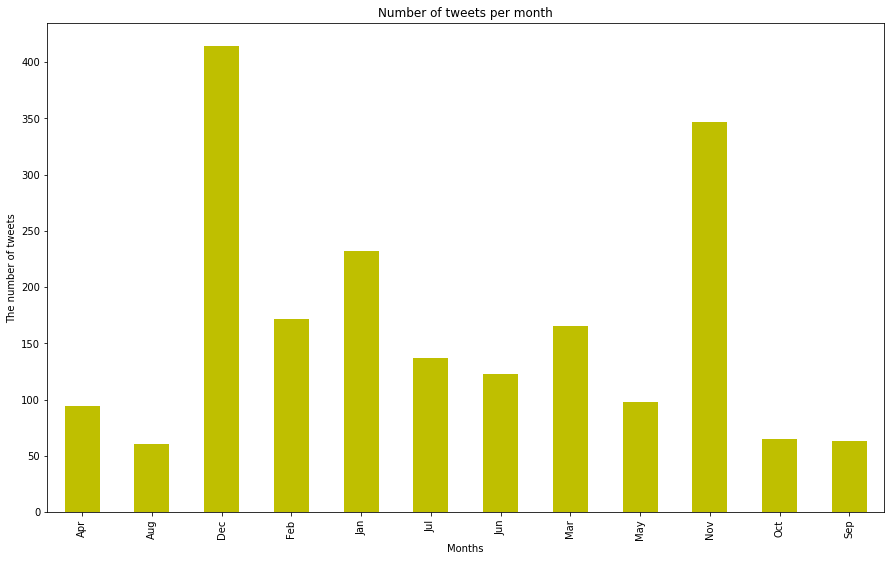

In [140]:
# checking the number of tweets in each month 
tweets_in_month = master_df.groupby('month')['Tweet_id'].count()
fig, ax = plt.subplots(figsize=(15,9))
tweets_in_month.plot(ax=ax,kind="bar",color='y')
ax.set_xlabel('Months')
ax.set_ylabel('The number of tweets')
ax.set_title('Number of tweets per month')

##### Observation :
I can observe that the top three months that have the highest number of tweets are December, November, and January.

### References
https://docs.tweepy.org/en/latest/getting_started.html

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

https://www.geeksforgeeks.org/pandas-how-to-reset-index-in-a-given-dataframe/

https://www.geeksforgeeks.org/python-random-sample-function/

https://www.geeksforgeeks.org/python-pandas-dataframe-rename/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine_first.html

https://www.geeksforgeeks.org/python-pandas-to_datetime/

https://stackoverflow.com/questions/52346751/dataframe-changing-the-datatype-by-using-astype

https://stackoverflow.com/questions/33810980/date-time-split-in-python

https://www.includehelp.com/python/splitting-timestamp-column-into-separate-date-and-time-columns.aspx

https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index


